In [8]:
import pandas as pd

# Membaca file CSV yang telah diunggah pengguna
file_path = '/content/CreditDataset.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset untuk melihat strukturnya
data.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


**Insight :**
Dataset yang ditampilkan terdiri dari 21 kolom dengan campuran data kategorikal (seperti "A11", "A34", dll.) dan numerik (seperti "6", "67"), serta target pada kolom "Class" yang tampaknya menjadi variabel klasifikasi.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 1. Mengidentifikasi kolom kategorikal untuk encoding
categorical_columns = data.select_dtypes(include=['object']).columns

# Menggunakan LabelEncoder untuk mengubah kolom kategorikal menjadi numerik
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Menyimpan encoder untuk referensi

# 2. Memisahkan fitur (X) dan target (y)
X = data.drop('Class', axis=1)  # 'Class' dianggap sebagai target
y = data['Class']

# 3. Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standarisasi data untuk SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Membuat dan melatih model SVR
svr_model = SVR(kernel='rbf')  # Menggunakan kernel RBF sebagai default
svr_model.fit(X_train_scaled, y_train)

# 6. Evaluasi model dengan Mean Squared Error
y_pred = svr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

mse

0.15492406296958738

**Insight :**
Menunjukkan proses implementasi model Support Vector Regression (SVR), mulai dari encoding data kategorikal, standarisasi fitur, hingga evaluasi model menggunakan Mean Squared Error (MSE), yang menghasilkan nilai error sebesar 0.1549, menandakan bahwa model cukup mampu menangkap pola dari data meskipun terdapat ruang untuk perbaikan.

Metrik Evaluasi Model Klasifikasi:
       Accuracy  Precision    Recall  F1-Score       AUC
Value       0.8   0.731707  0.508475       0.6  0.800577


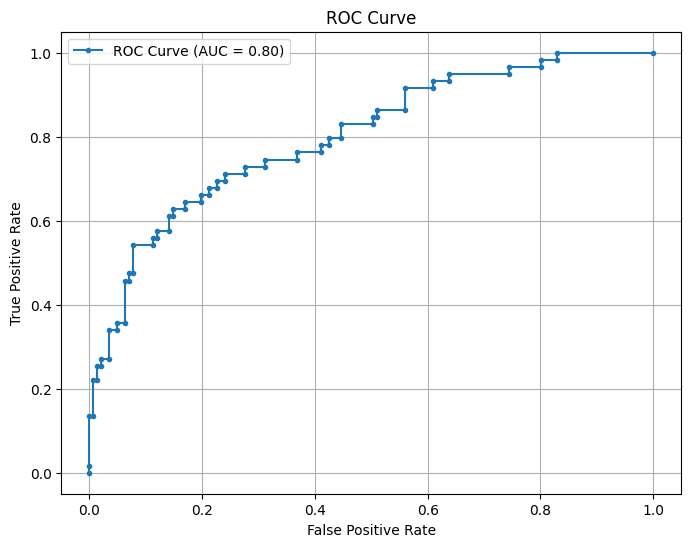

In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import pandas as pd

# Mengonversi hasil prediksi menjadi klasifikasi biner (threshold 1.5 untuk memisahkan 1 dan 2)
y_test_class = (y_test > 1).astype(int)  # Mengonversi target menjadi biner (0 dan 1)
y_pred_class = (y_pred > 1.5).astype(int)  # Threshold untuk klasifikasi dari hasil regresi

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
auc = roc_auc_score(y_test_class, y_pred)

# Menyusun metrik evaluasi ke dalam DataFrame
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc,
}
evaluation_df = pd.DataFrame(evaluation_metrics, index=["Value"])

# Menampilkan metrik evaluasi
print("Metrik Evaluasi Model Klasifikasi:")
print(evaluation_df)

# Membuat ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label="ROC Curve (AUC = {:.2f})".format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

**Insight :**
Model klasifikasi menunjukkan performa yang cukup baik dengan akurasi sebesar 80%, presisi 73.17%, dan area di bawah kurva (AUC) sebesar 0.80, meskipun recall sebesar 50.85% mengindikasikan bahwa model masih perlu ditingkatkan untuk menangkap lebih banyak kelas positif sebenarnya.